<a href="https://colab.research.google.com/github/ni30kp/CBData_Science/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [2]:
dfx = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
rename_train = {'p_id': 'p_id', 'no_times_pregnant': 'Pregnancies', 'glucose_concentration': 'Glucose', 'skin_fold_thickness': 'SkinThickness',
         'blood_pressure': 'BloodPressure', 'serum_insulin': 'Insulin', 'bmi': 'BMI', 'diabetes pedigree': 'DiabetesPedigreeFunction',
         'age': 'Age', 'diabetes': 'Label'}

rename_test = {'p_id': 'p_id', 'no_times_pregnant': 'Pregnancies', 'glucose_concentration': 'Glucose', 'skin_fold_thickness': 'SkinThickness',
         'blood_pressure': 'BloodPressure', 'serum_insulin': 'Insulin', 'bmi': 'BMI', 'diabetes pedigree': 'DiabetesPedigreeFunction',
         'age': 'Age'}

In [4]:

dfx.rename(columns=rename_train, inplace=True)
df_test.rename(columns=rename_test, inplace=True)
dfy = dfx.Label
dfx.drop(columns='Label', inplace=True)


In [5]:
features_NaN = [['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

for feature in features_NaN:
    dfx[feature] = dfx[feature].replace(0, np.NaN)
    df_test[feature] = df_test[feature].replace(0, np.NaN)

In [6]:
dfx['Glucose'].fillna(dfx['Glucose'].mean(), inplace=True)
dfx['BloodPressure'].fillna(dfx['BloodPressure'].mean(), inplace=True)
dfx['SkinThickness'].fillna(dfx['SkinThickness'].median(), inplace=True)
dfx['Insulin'].fillna(dfx['Insulin'].median(), inplace=True)
dfx['BMI'].fillna(dfx['BMI'].median(), inplace=True)

In [7]:
df_test['Glucose'].fillna(dfx['Glucose'].mean(), inplace=True)
df_test['BloodPressure'].fillna(dfx['BloodPressure'].mean(), inplace=True)
df_test['SkinThickness'].fillna(dfx['SkinThickness'].median(), inplace=True)
df_test['Insulin'].fillna(dfx['Insulin'].median(), inplace=True)
df_test['BMI'].fillna(dfx['BMI'].median(), inplace=True)

In [8]:
features = [['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
scaler = StandardScaler()

for feature in features:
    dfx[feature] = scaler.fit_transform(dfx[feature])
    df_test[feature] = scaler.fit_transform(df_test[feature])


In [9]:
dfx.drop(['SkinThickness'], axis=1, inplace=True)
df_test.drop(['SkinThickness'], axis=1, inplace=True)

In [10]:
dfx.head()

,p_id,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,316,-0.552371,-0.314638,-0.367839,-0.534037,0.243011,-0.457475,-0.614583
1,25,2.129880,0.730471,1.794964,0.050693,0.607040,-0.641865,1.482759
2,710,-0.552371,-0.955189,-0.700578,0.208121,0.810897,0.627706,-0.866264
3,658,-0.850399,-0.044933,0.630378,0.657914,0.941948,2.102825,0.643822
4,542,-0.254343,0.224773,-0.035100,0.545465,-0.004530,0.249857,-0.530689


In [11]:
pids = df_test['p_id']


In [12]:
X_train = dfx.values
Y_train = dfy.values
X_test = df_test.values
pids = pids.values

In [13]:
def hypothesis(x, w, b):
    # This function will take input vector x, weight vector w, bias b and return the hypothesis or predicted value
    
    hx = np.dot(x,w)+b
    return sigmoid(hx)

def sigmoid(z):
    sig = 1.0/(1.0 + np.exp(-1.0*z))
    return sig

def error(Y_train, X_train, w, b):
    
    err = 0.0
    m = X_train.shape[0]
    
    for i in range(m):
        
        x = X_train[i]
        y = Y_train[i]
        hx = hypothesis(x, w, b)
        err += y*np.log2(hx) + (1-y)*np.log2(1-hx)
    
    err = -1.0*err
        
    return err/m

def gradient(Y_train, X_train, w, b):
    
    m = X_train.shape[0]
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    for i in range(m):
        hx = hypothesis(X_train[i], w, b)
        grad_w += (Y_train[i]-hx)*X_train[i]
        grad_b += Y_train[i]-hx
        
    grad_w /= m
    grad_b /= m
    
    return [grad_w, grad_b]

def gradient_ascent(Y_train, X_train, w, b, max_iter=1000, learning_rate=0.1):
    
    error_list = []
    
    for i in range(max_iter):
        
        err = error(Y_train, X_train, w, b)
        error_list.append(err)
        [grad_w, grad_b] = gradient(Y_train, X_train, w, b)
        w = w + learning_rate*grad_w
        b = b + learning_rate*grad_b
        
    return error_list, w, b

def predictions(X_test, w, b):
    
    confidence = hypothesis(X_test, w, b)
    Y_pred = []
    
    for val in confidence:
        if val<0.5:
            Y_pred.append(0)
        else:
            Y_pred.append(1)
            
    return Y_pred

In [14]:
## Initialize the Weight vectors and call the function

W = 2*np.random.random(((X_train.shape[1]-1),))
B = 5*np.random.random()

error_list, w, b = gradient_ascent(Y_train, X_train[:,1:], W, B)

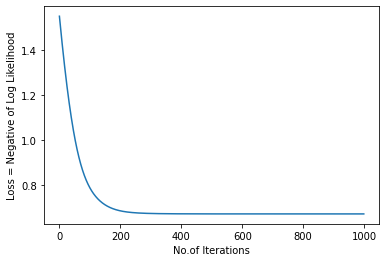

In [15]:
## Plot the loss function -> Error
## This indicates that the loss has significantly decreased over time

plt.plot(error_list)
plt.xlabel('No.of Iterations')
plt.ylabel('Loss = Negative of Log Likelihood')
plt.show()

In [16]:
pred = predictions(X_test[:, 1:], w, b)

In [18]:
output = pd.DataFrame({'pids': pids, 'diabetes': pred})
output.to_csv('my_submission_lr.csv', index=False)
print("Your submission was successfully Done!")

Your submission was successfully Done!
